In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [50]:
df=pd.read_csv('D:\\Mukul\\Python\\DataSet\\Spaceship_Titanic\\train.csv')

In [51]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [53]:
df.shape

(8693, 14)

## Exploratory Data Analysis

In [54]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [55]:
## 1st step make the list of all the features which has missing values
features_with_nan=[features for features in df.columns if df[features].isnull().sum()>1]

## 2nd step print the feature name and the percentage of missing values

for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

HomePlanet 0.0231 % missing values
CryoSleep 0.025 % missing values
Cabin 0.0229 % missing values
Destination 0.0209 % missing values
Age 0.0206 % missing values
VIP 0.0234 % missing values
RoomService 0.0208 % missing values
FoodCourt 0.0211 % missing values
ShoppingMall 0.0239 % missing values
Spa 0.0211 % missing values
VRDeck 0.0216 % missing values
Name 0.023 % missing values


In [56]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [57]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [58]:
df['VIP'].unique()

array([False, True, nan], dtype=object)

In [59]:
## list of numerical variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  7


In [60]:
df[numerical_features]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False
8689,18.0,0.0,0.0,0.0,0.0,0.0,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False


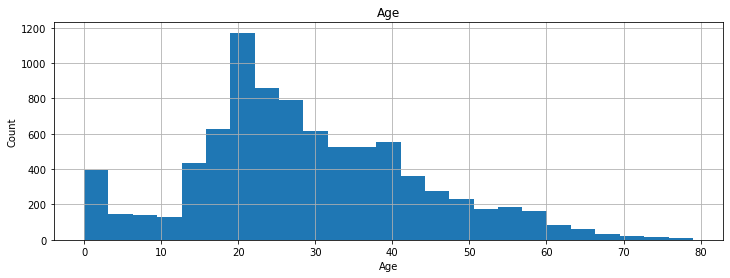

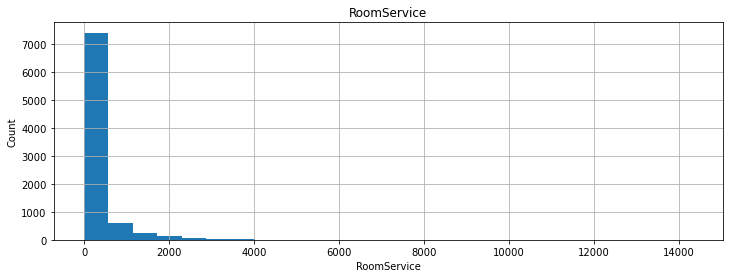

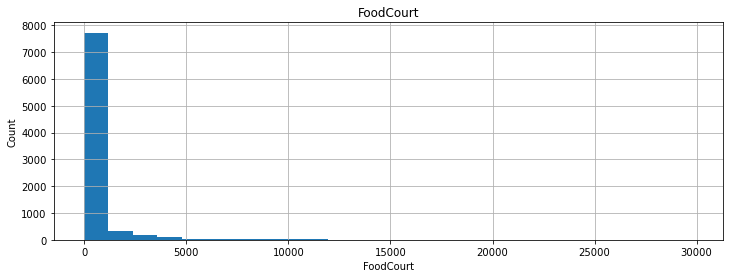

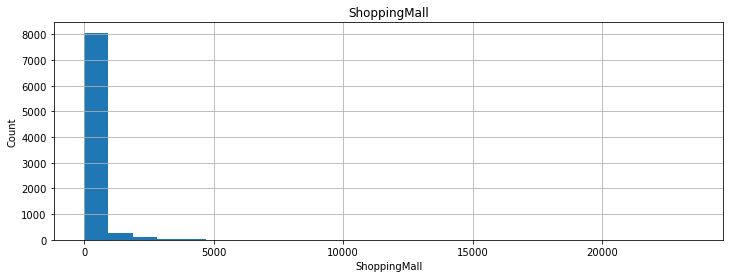

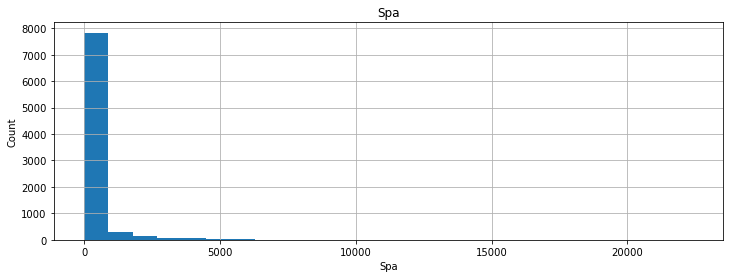

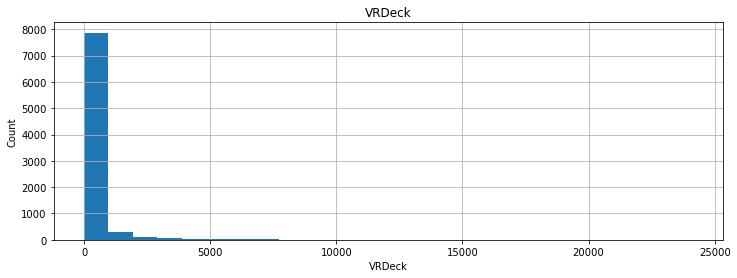

In [61]:

for feature in numerical_features:
    if feature != 'Transported':
        df=df.copy()
        plt.figure(figsize=(12,4))
        df[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

In [62]:
## lets find outthe outliers
for feature in numerical_features:
    df=df.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [63]:
categorial_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorial_features

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [64]:
df[categorial_features].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines


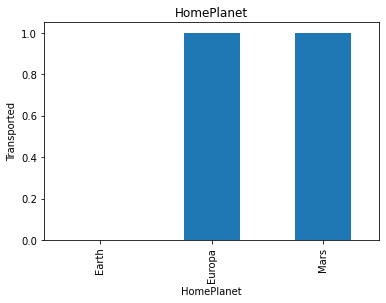

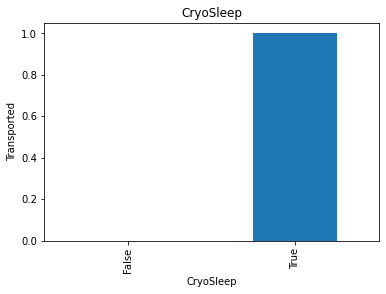

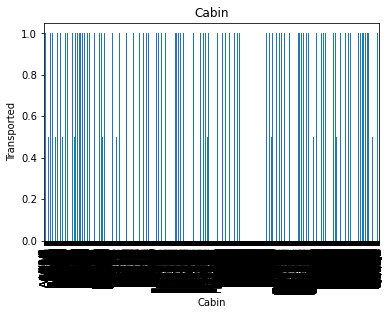

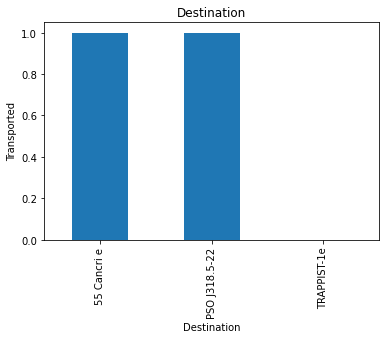

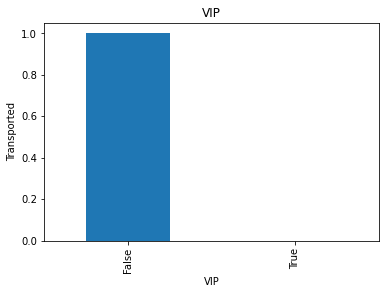

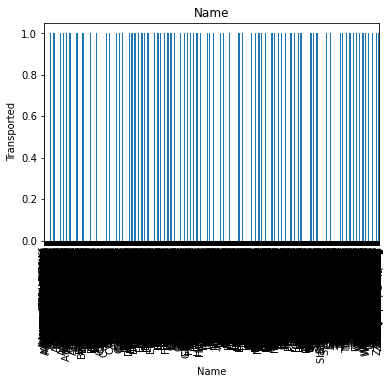

In [65]:
for feature in categorial_features:
    df=df.copy()
    if feature != 'PassengerId':
        df.groupby(feature)['Transported'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Transported')
        plt.title(feature)
        plt.show()

<AxesSubplot:xlabel='Transported', ylabel='count'>

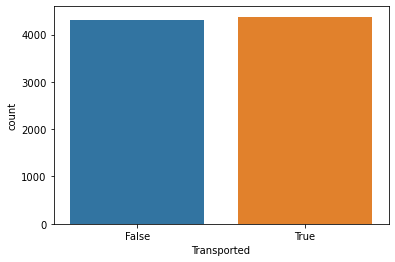

In [66]:
sns.countplot(x=df['Transported'])

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

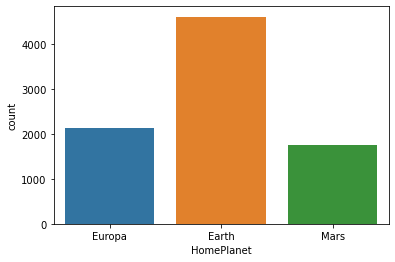

In [67]:
sns.countplot(x=df['HomePlanet'])

In [68]:
df.groupby(['CryoSleep','Transported']).size()

CryoSleep  Transported
False      False          3650
           True           1789
True       False           554
           True           2483
dtype: int64

<AxesSubplot:xlabel='CryoSleep,Transported'>

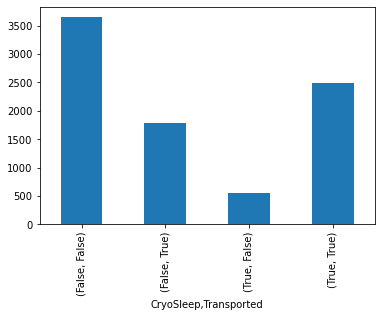

In [69]:
df.groupby(['CryoSleep','Transported']).size().plot.bar()

In [70]:
df.groupby(['HomePlanet','Transported']).size()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      False           727
            True           1404
Mars        False           839
            True            920
dtype: int64

<AxesSubplot:xlabel='HomePlanet,Transported'>

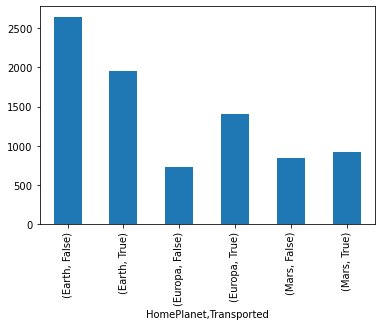

In [71]:
df.groupby(['HomePlanet','Transported']).size().plot.bar()

In [72]:
df.groupby(['VIP','Transported']).size()

VIP    Transported
False  False          4093
       True           4198
True   False           123
       True             76
dtype: int64

<AxesSubplot:xlabel='VIP,Transported'>

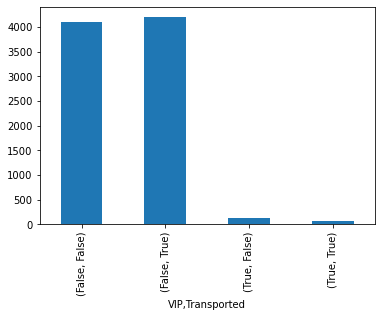

In [73]:
df.groupby(['VIP','Transported']).size().plot.bar()

In [74]:
df.groupby(['Destination','Transported']).size()

Destination    Transported
55 Cancri e    False           702
               True           1098
PSO J318.5-22  False           395
               True            401
TRAPPIST-1e    False          3128
               True           2787
dtype: int64

<AxesSubplot:xlabel='Destination,Transported'>

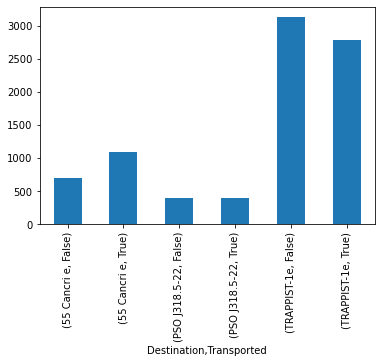

In [75]:
df.groupby(['Destination','Transported']).size().plot.bar()

<AxesSubplot:>

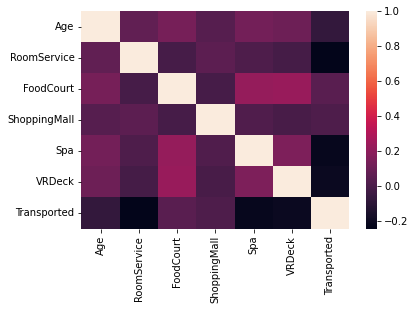

In [76]:
sns.heatmap(df.corr())

## Feature Engineering

In [77]:
numerical_feat_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']

for feature in numerical_feat_nan:
    print('The {} feature has {}% missing values'.format(feature,np.round(df[feature].isnull().mean(),4)))

The Age feature has 0.0206% missing values
The RoomService feature has 0.0208% missing values
The FoodCourt feature has 0.0211% missing values
The ShoppingMall feature has 0.0239% missing values
The Spa feature has 0.0211% missing values
The VRDeck feature has 0.0216% missing values


In [78]:
## get cryo people
# numerical_feat_nan_in_cryo_sleep=[feature for feature in numerical_feat_nan.columns where]

In [79]:
for feature in numerical_feat_nan:
    # we will replace by median because of outliers
    if feature == 'Age':
        median_value=df[feature].median()

        #replace the nan value with median
        df[feature].fillna(median_value,inplace=True)
    else:
        # filter=df['CryoSleep']=='True'
        # median_value=df[feature].where(filter).median()
        replace_value = df[df[df['CryoSleep']=='True'][feature]]=0
        
        df[feature].fillna(replace_value,inplace=True)

In [80]:
# df['RoomService'] = np.where(((df.CryoSleep == 'True')), 0)

In [81]:
# to see if still any value is missing
df[numerical_feat_nan].isnull().sum()

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [82]:
### Categorical

In [83]:
# first handle nan values in categorial features

features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']
 
for feature in features_nan:
              print('The {} feature as {} % missing values'.format(feature,np.round(df[feature].isnull().mean(),4)))

The HomePlanet feature as 0.0231 % missing values
The CryoSleep feature as 0.025 % missing values
The Cabin feature as 0.0229 % missing values
The Destination feature as 0.0209 % missing values
The VIP feature as 0.0234 % missing values
The Name feature as 0.023 % missing values


In [84]:
df[features_nan]

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


In [85]:
df['Cabin'].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [86]:
df['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [87]:
df=df.drop(['Cabin', 'Name'], axis=1)

In [88]:
df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [98]:
df['VIP']=df['VIP'].map({True: 'Yes', False: 'No'})

In [99]:
df['VIP'].value_counts()

No     8291
Yes     199
Name: VIP, dtype: int64

In [100]:
df['CryoSleep'] = np.where(((df.FoodCourt == 0) & (df.ShoppingMall == 0) & (df.RoomService == 0) & (df.Spa == 0) & (df.VRDeck == 0)), 'True', 'False')

In [101]:
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']
 
for feature in features_nan:
              print('The {} feature as {} % missing values'.format(feature,np.round(df[feature].isnull().mean(),4)))

The HomePlanet feature as 0.0231 % missing values
The Destination feature as 0.0209 % missing values
The VIP feature as 0.0234 % missing values


In [102]:
## replace nan values with new label

def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=df[features_nan].fillna('Missing')
    return data

df=replace_cat_feature(df,features_nan)

In [103]:
df[features_nan].isnull().sum()

HomePlanet     0
Destination    0
VIP            0
dtype: int64

In [104]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,True,TRAPPIST-1e,39.0,No,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,No,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,TRAPPIST-1e,58.0,Yes,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,TRAPPIST-1e,33.0,No,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,TRAPPIST-1e,16.0,No,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,Yes,0.0,6819.0,0.0,1643.0,74.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,No,0.0,0.0,0.0,0.0,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,No,0.0,0.0,1872.0,1.0,0.0,True
8691,9280_01,Europa,False,55 Cancri e,32.0,No,0.0,1049.0,0.0,353.0,3235.0,False


In [105]:
df['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', 'Missing'], dtype=object)

In [106]:
categorial_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorial_features

['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [107]:
df=df.drop(['PassengerId'], axis=1)

In [108]:
categorial_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorial_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

In [216]:
df['VIP'].unique()

array([False, True, 'Missing'], dtype=object)

In [109]:
df['VIP'].value_counts()

No         8291
Missing     203
Yes         199
Name: VIP, dtype: int64

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
for feature in categorial_features:
    le=LabelEncoder()
    encoded=le.fit_transform(df[feature])
    
    df.drop(feature, axis=1, inplace=True)
    
    df[feature]=encoded

In [112]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet,CryoSleep,Destination,VIP
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,1,3,1
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,3,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,3,2
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,3,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0,0,3,1


## Feature Scaling

In [132]:
scaling_feature=[feature for feature in df.columns if feature not in ['Transported']]

len(scaling_feature)

10

In [133]:
X=df[scaling_feature]

In [134]:
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,CryoSleep,Destination,VIP
0,39.0,0.0,0.0,0.0,0.0,0.0,1,1,3,1
1,24.0,109.0,9.0,25.0,549.0,44.0,0,0,3,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,1,0,3,2
3,33.0,0.0,1283.0,371.0,3329.0,193.0,1,0,3,1
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,3,1


In [135]:
y=df['Transported']

In [136]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.30)

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler=StandardScaler()

In [141]:
X_train=scaler.fit_transform(X_train)

In [142]:
X_train

array([[ 0.98816524, -0.32747394,  0.61053357, ..., -0.84047232,
         0.62411519,  0.01050341],
       [-0.40501954, -0.32747394, -0.28792694, ...,  1.18980718,
         0.62411519,  0.01050341],
       [ 1.19714296, -0.31577811,  0.11887601, ..., -0.84047232,
         0.62411519,  0.01050341],
       ...,
       [-0.47467877, -0.09648125, -0.28792694, ..., -0.84047232,
        -0.20004734,  0.01050341],
       [ 0.36123209,  0.22661613, -0.28792694, ..., -0.84047232,
         0.62411519,  0.01050341],
       [-0.05672334, -0.31724009,  0.01717527, ..., -0.84047232,
        -1.84837241,  0.01050341]])

In [143]:
X_test=scaler.transform(X_test)

## Model Training

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [145]:
rf=RandomForestClassifier()

In [146]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [148]:
y_pred=rf.predict(X_test)

In [151]:
y_pred.dtype

dtype('bool')

In [152]:
y_test.dtype

dtype('bool')

In [174]:
accuracy_score(y_test,y_pred)

0.7691717791411042

In [156]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [157]:
lg.fit(X_train,y_train)

LogisticRegression()

In [158]:
y_pred_lg=lg.predict(X_test)

In [159]:
accuracy_score(y_test,y_pred_lg)

0.7802914110429447

In [160]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [161]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [162]:
y_predict_gbc=gbc.predict(X_test)

In [163]:
accuracy_score(y_test,y_predict_gbc)

0.7917944785276073

In [170]:
from sklearn.svm import SVC
svc = SVC()

In [171]:
svc.fit(X_train,y_train)

SVC()

In [172]:
y_pred_svc=svc.predict(X_test)

In [173]:
accuracy_score(y_test,y_pred_svc)

0.7783742331288344

In [175]:
df = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest', 
                              'Gradient Boosting',
                              'SVM'],accuracy=[accuracy_score(y_test,y_pred_lg), accuracy_score(y_test,y_pred), 
                                               accuracy_score(y_test,y_predict_gbc), accuracy_score(y_test,y_pred_svc)]))

In [176]:
df

,model,accuracy
0,Logistic Regression,0.780291
1,Random Forest,0.769172
2,Gradient Boosting,0.791794
3,SVM,0.778374
